# Kaggle Titanic challenge

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

## Data analysis

In [33]:
# Fetch data from kaggle using kaggle-cli
# kg download -c titanic -u Bobox214 -p XXXXX

In [3]:
PATH = "data/"

In [4]:
os.listdir(PATH)

['gender_submission.csv', 'test_sub.csv', 'train.csv', 'test.csv']

In [5]:
train_df = pd.read_csv(f'{PATH}/train.csv')
test_df  = pd.read_csv(f'{PATH}/test.csv')

In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.drop(columns=['Cabin','Name','Ticket'],inplace=True)
test_df.drop(columns=['Cabin','Name','Ticket'],inplace=True)

In [12]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


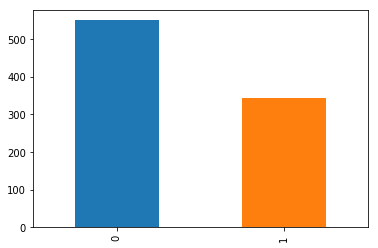

In [13]:
train_df.Survived.value_counts().plot(kind='bar')

In [14]:
# getting the necessary columns for building the model #
train_X = train_df[["Pclass"]] # "SibSp", "Parch", "Fare"]]
train_y = train_df["Survived"]
test_X = test_df[["Pclass"]] #, "SibSp", "Parch", "Fare"]]

In [15]:
train_X.head(5)

,Pclass
0,3
1,1
2,3
3,1
4,3


## Logistic regression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size=0.33, random_state=42)

In [18]:
from sklearn import linear_model as lm
clf = lm.LogisticRegression()

In [19]:
clf.fit(dev_X,dev_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Predict on the validation sample #
val_preds = clf.predict(val_X)

In [21]:
val_preds[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(val_y, val_preds)

0.6983050847457627

## Submissions analysis

In [23]:
dflt_sub_df = pd.read_csv(f'{PATH}/gender_submission.csv')

In [24]:
dflt_sub_df.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [25]:
test_preds = clf.predict(test_X)

In [26]:
test_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [27]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [28]:
test_y_df = pd.DataFrame(data={'Survived':test_preds})
test_y_df.head(5)

,Survived
0,0
1,0
2,0
3,0
4,0


In [29]:
my_sub = pd.concat((test_df[['PassengerId']],test_y_df),axis='columns')
my_sub.shape

(418, 2)

In [30]:
my_sub.head(4)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0


In [31]:
my_sub.to_csv(f'{PATH}/test_sub.csv',index=False)

In [32]:
!ls -lart {PATH}

total 104
-rw-rw-r-- 1 paperspace paperspace 61194 Feb 13 13:59 train.csv
-rw-rw-r-- 1 paperspace paperspace 28629 Feb 13 13:59 test.csv
-rw-rw-r-- 1 paperspace paperspace  3258 Feb 13 13:59 gender_submission.csv
drwxrwxr-x 2 paperspace paperspace  4096 Feb 13 15:35 .
drwxrwxr-x 4 paperspace paperspace  4096 Feb 13 15:37 ..
-rw-rw-r-- 1 paperspace paperspace  2839 Feb 13 15:38 test_sub.csv


In [ ]:
# Submit data to kaggle using kaggle-cli
# kg submit data/-c titanic -u Bobox214 -p XXXXX